<center><b><h1> Employee Attrition Analysis </h1></b></center>
<p style="text-align: right">By: Vedansh Chauhan</p>

#### Contents:
- [Introduction](#section-one)
- [Stage 1: Data Acquisition](#section-two)
- [Stage 2: Data Preprocessing](#section-three)
- [Stage 3: Model Building and Training](#section-four)
- [Stage 4: Model Testing](#section-five)
- [Conclusion](#section-six)

## Introduction <a id="section-one"></a>

Employee attrition is the gradual reduction of a company's workforce over time. It may occur due to a number of factors such as voluntary resignations, retirements, and other forms of departure. It's different from employee turnover, which encompasses both voluntary and involuntary separations, including layoffs and terminations.

High attrition rates can indicate underlying issues within a company, such as poor management, lack of career growth opportunities, or inadequate compensation. Managing attrition effectively is crucial for any company, as it involves understanding its causes, addressing any systemic issues, and implementing strategies to retain valuable employees.

This project involves utilizing a given dataset of a company to create a predictive model that can predict whether an employee might depart or not. Analyzing the likelihood of attrition can assist in improving employee satisfaction and reducing the same.

#### Problem Statement:
XYZ Company, which was established a few years ago, is facing an attrition rate of around 15% for the past couple of years. This is significantly affecting the company in many aspects. In order to understand why employees are leaving and to reduce the attrition rate, XYZ Company has approached an HR analytics consultancy for analyzing the data they have. You are playing the role of an HR analyst in this project and building a dashboard that can help the organization make data-driven decisions.

#### Objectives:
- Analyze data from XYZ Company.
- Prepare the data for modeling.
- Optimize and implement a machine learning algorithm to predict attrition.

## Stage 1: DATA ACQUISITION <a id="section-two"></a>
#### Objectives:
- Importing the necessary libraries
- Importing the dataset

#### Importing the necessary libraries

In [1]:
#Basic Libraries
import pandas
import numpy

#Visulization
import seaborn as sns
import matplotlib.pyplot as plt

#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from imblearn.over_sampling import SMOTE

#Modeling
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Importing the dataset

In [2]:
emp = pandas.read_csv("C:\\Users\\Vedansh Chauhan\\Documents\\I2\\Project 8\\Attrition data.csv")

In [3]:
emp.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [4]:
#Shape of the dataframe (number of rows and colummns)
emp.shape

(4410, 29)

In [5]:
print("The data consist of the following columns:")
count=1
for i in emp.columns:
    print(f"{count}. {i}")
    count+=1

The data consist of the following columns:
1. EmployeeID
2. Age
3. Attrition
4. BusinessTravel
5. Department
6. DistanceFromHome
7. Education
8. EducationField
9. EmployeeCount
10. Gender
11. JobLevel
12. JobRole
13. MaritalStatus
14. MonthlyIncome
15. NumCompaniesWorked
16. Over18
17. PercentSalaryHike
18. StandardHours
19. StockOptionLevel
20. TotalWorkingYears
21. TrainingTimesLastYear
22. YearsAtCompany
23. YearsSinceLastPromotion
24. YearsWithCurrManager
25. EnvironmentSatisfaction
26. JobSatisfaction
27. WorkLifeBalance
28. JobInvolvement
29. PerformanceRating


<center><b><h3>DATA DICTIONARY</h3></b></center>

|Serial No.|Column Name|Explanation|
|-|-|-|
| 1 | EmployeeID | A unique identifier for each employee. |
| 2 | Age | The age of the employee. |
| 3 | Attrition | Indicates whether the employee has left the company. |
| 4 | BusinessTravel | Frequency of business travel. |
| 5 | Department | The department the employee belongs to. |
| 6 | DistanceFromHome | Distance of employee's residence from the workplace. |
| 7 | Education | Level of education attained by the employee. |
| 8 | EducationField | Field of education of the employee. |
| 9 | EmployeeCount | Usually a constant value indicating the number of employees in the dataset. |
| 10 | Gender | Gender of the employee. |
| 11 | JobLevel | Level of the employee's job within the company hierarchy. |
| 12 | JobRole | The specific role or position of the employee within the company. |
| 13 | MaritalStatus | Marital status of the employee. |
| 14 | MonthlyIncome | The monthly income of the employee. |
| 15 | NumCompaniesWorked | Number of companies the employee has worked for previously. |
| 16 | Over18 | Indicates whether the employee is over 18 years old or not. |
| 17 | PercentSalaryHike | The percentage increase in salary during the last salary hike. |
| 18 | StandardHours | Standard number of working hours per day. |
| 19 | StockOptionLevel | Level of stock options granted to the employee. |
| 20 | TotalWorkingYears | Total number of years the employee has been employed. |
| 21 | TrainingTimesLastYear | Number of times the employee was trained last year. |
| 22 | YearsAtCompany | Number of years the employee has been with the company. |
| 23 | YearsSinceLastPromotion | Number of years since the employee's last promotion. |
| 24 | YearsWithCurrManager | Number of years the employee has been with their current manager. |
| 25 | EnvironmentSatisfaction | Satisfaction level of the employee with the work environment. |
| 26 | JobSatisfaction | Satisfaction level of the employee with their job. |
| 27 | WorkLifeBalance | Level of balance between work life and personal life perceived by the employee. |
| 28 | JobInvolvement | Level of involvement of the employee in their job. |
| 29 | PerformanceRating | Performance rating of the employee. |

<center><i>Note: "Attrition" is the target/dependent variable.</i></center>

In [6]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   Age                      4410 non-null   int64  
 2   Attrition                4410 non-null   object 
 3   BusinessTravel           4410 non-null   object 
 4   Department               4410 non-null   object 
 5   DistanceFromHome         4410 non-null   int64  
 6   Education                4410 non-null   int64  
 7   EducationField           4410 non-null   object 
 8   EmployeeCount            4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

*There appear to be some null values, which I will address in the pre-processing section.*

## Stage 2: DATA PREPROCESSING <a id="section-three"></a>
#### Objectives:
- Imputation
- Duplicate Records Elimination
- Categorical Label Encoding
- Outlier Detection and Elimination
- Feature Engineering
- Feature Scaling
- Feature Selection
- Target Column Balancing

#### Imputation
Here, I shall inspect if the data contains any null or NaN (Not a number) values.

In [7]:
#Columns with null values
print("The columns in the data with null values are:")
count=1
for n in emp.columns[emp.isnull().any()]:
    print(f"{count}. {n}")
    count+=1

The columns in the data with null values are:
1. NumCompaniesWorked
2. TotalWorkingYears
3. EnvironmentSatisfaction
4. JobSatisfaction
5. WorkLifeBalance


#### Observations and Actions:
- There are 5 columns with NaN/null values in the data.
- The columns 'NumCompaniesWorked' and 'TotalWorkingYears' being a null value might suggest no prior work experience. I'll impute these values by '0'.
- The fact that the remaining three columns are blank might suggest the employee's unwillingness to share their feedback, rather than necessarily indicating a rating of '0', although either scenario could be the case. I'll remove the rows with null values in these three columns.

In [8]:
#Handling NAN values
emp['NumCompaniesWorked'] = emp['NumCompaniesWorked'].fillna(0)
emp['TotalWorkingYears'] = emp['TotalWorkingYears'].fillna(0)
emp['EnvironmentSatisfaction'] = emp['EnvironmentSatisfaction'].fillna(emp['EnvironmentSatisfaction'].mode()[0])
emp['JobSatisfaction'] = emp['JobSatisfaction'].fillna(emp['JobSatisfaction'].mode()[0])
emp['WorkLifeBalance'] = emp['WorkLifeBalance'].fillna(emp['WorkLifeBalance'].mode()[0])

In [9]:
emp.columns[emp.isnull().any()]

Index([], dtype='object')

*All the NaN/null values have been delth with.*

#### Duplicate Records Elimination

In [10]:
print(f"There are {emp.duplicated().sum()} duplicate values in the data.")

There are 0 duplicate values in the data.


*Which is a good sign!*

In [11]:
#Exporting a .CSV file for Exploratory Data Analysis in Tableau
emp.to_csv('cleaned_emp.csv', index=False)

#### Categorical Label Encoding
##### The 'Attrition' column (target column)

In [11]:
emp['Attrition'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
#Dictionary Mapping
att_map = {'Yes': 1, 'No': 0}
emp['Attrition_encoded'] = emp['Attrition'].map(att_map)

##### The 'BusinessTravel' column

In [13]:
emp['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [14]:
#Dictionary Mapping
map_travel = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
emp['Business_Travel_encoded'] = emp['BusinessTravel'].map(map_travel)

##### The 'Department' column

In [15]:
emp['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [16]:
#Dictionary Mapping
map_dept = {'Sales': 1, 'Research & Development': 2, 'Human Resources': 3}
emp['Department_encoded'] = emp['Department'].map(map_dept)

##### The 'EducationField' column

In [17]:
emp['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [18]:
#Dictionary Mapping
field_map = {'Life Sciences': 1, 'Other': 2, 'Medical': 3,
             'Marketing': 4, 'Technical Degree': 5, 'Human Resources': 6}
emp['Education_Field_encoded'] = emp['EducationField'].map(field_map)

##### The 'Gender' column

In [19]:
emp['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
#Using One-Hot encoding
gender = pandas.get_dummies(emp['Gender'], drop_first=True).astype('int')
gender.head(n=3) #Inspecting which unique value will be assigned to the new column

,Male
0,0
1,0
2,1


*The column name suggests that 'Male' will be denoted by '1' while Female will be denoted by '0'.*

In [21]:
#Adding the column to the dataframe
emp['Male'] = gender

##### The 'JobRole' column

In [22]:
emp['JobRole'].unique()

array(['Healthcare Representative', 'Research Scientist',
       'Sales Executive', 'Human Resources', 'Research Director',
       'Laboratory Technician', 'Manufacturing Director',
       'Sales Representative', 'Manager'], dtype=object)

In [23]:
#Dictionary Mapping
role_map = {'Healthcare Representative': 1, 'Research Scientist': 2, 'Sales Executive': 3, 'Human Resources': 4, 'Research Director': 5,
            'Laboratory Technician': 6, 'Manufacturing Director': 7, 'Sales Representative': 8, 'Manager': 9}
emp['Job_Role_encoded'] = emp['JobRole'].map(role_map)

##### The 'MaritalStatus' column

In [24]:
emp['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [25]:
mar = {'Married': 2, 'Single': 1, 'Divorced': 0}
emp['Marital_Status_encoded'] = emp['MaritalStatus'].map(mar)

##### The 'Over18' column

In [26]:
emp['Over18'].unique()

array(['Y'], dtype=object)

*Every employee appears to be over 18 years old, suggesting that this column wouldn't exhibit any pattern to learn. Hence, I'll remove it from the data.*

In [27]:
#Dropping all older categorical columns
emp.drop(['Attrition', 'Over18', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus'], axis=1, inplace=True)

#### Outlier Detection and Elimination

In [28]:
emp.describe()

,EmployeeID,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition_encoded,Business_Travel_encoded,Department_encoded,Education_Field_encoded,Male,Job_Role_encoded,Marital_Status_encoded
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,...,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.683220,15.209524,8.0,...,2.761436,2.729932,3.153741,0.161224,1.086395,1.739456,2.462585,0.600000,4.389116,1.235374
std,1273.201673,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.499737,3.659108,0.0,...,0.703195,0.711400,0.360742,0.367780,0.532049,0.527673,1.431455,0.489954,2.439947,0.790578
min,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,...,1.000000,1.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1103.250000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000
50%,2205.500000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,...,3.000000,3.000000,3.000000,0.000000,1.000000,2.000000,3.000000,1.000000,3.000000,1.000000
75%,3307.750000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,3.000000,3.000000,0.000000,1.000000,2.000000,3.000000,1.000000,6.000000,2.000000
max,4410.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,...,4.000000,4.000000,4.000000,1.000000,2.000000,3.000000,6.000000,1.000000,9.000000,2.000000


#### Observations:
- **Central Tendency:** The Mean and Median (or the'50%' row) are quite close in the columns which suggest slight to no skewness of the data distribution.
- **Dispersion:** The Standard Deviations of most columns are close to 0 which is a good sign as it suggests minimal variance. However, some columns do have a higher amount of diviation.
- **Minimum and Maximum values:** There's a great variation in the mimimum and maximum values of the different columns which indicates difference in scales.

##### Box Plots to visualize outliers

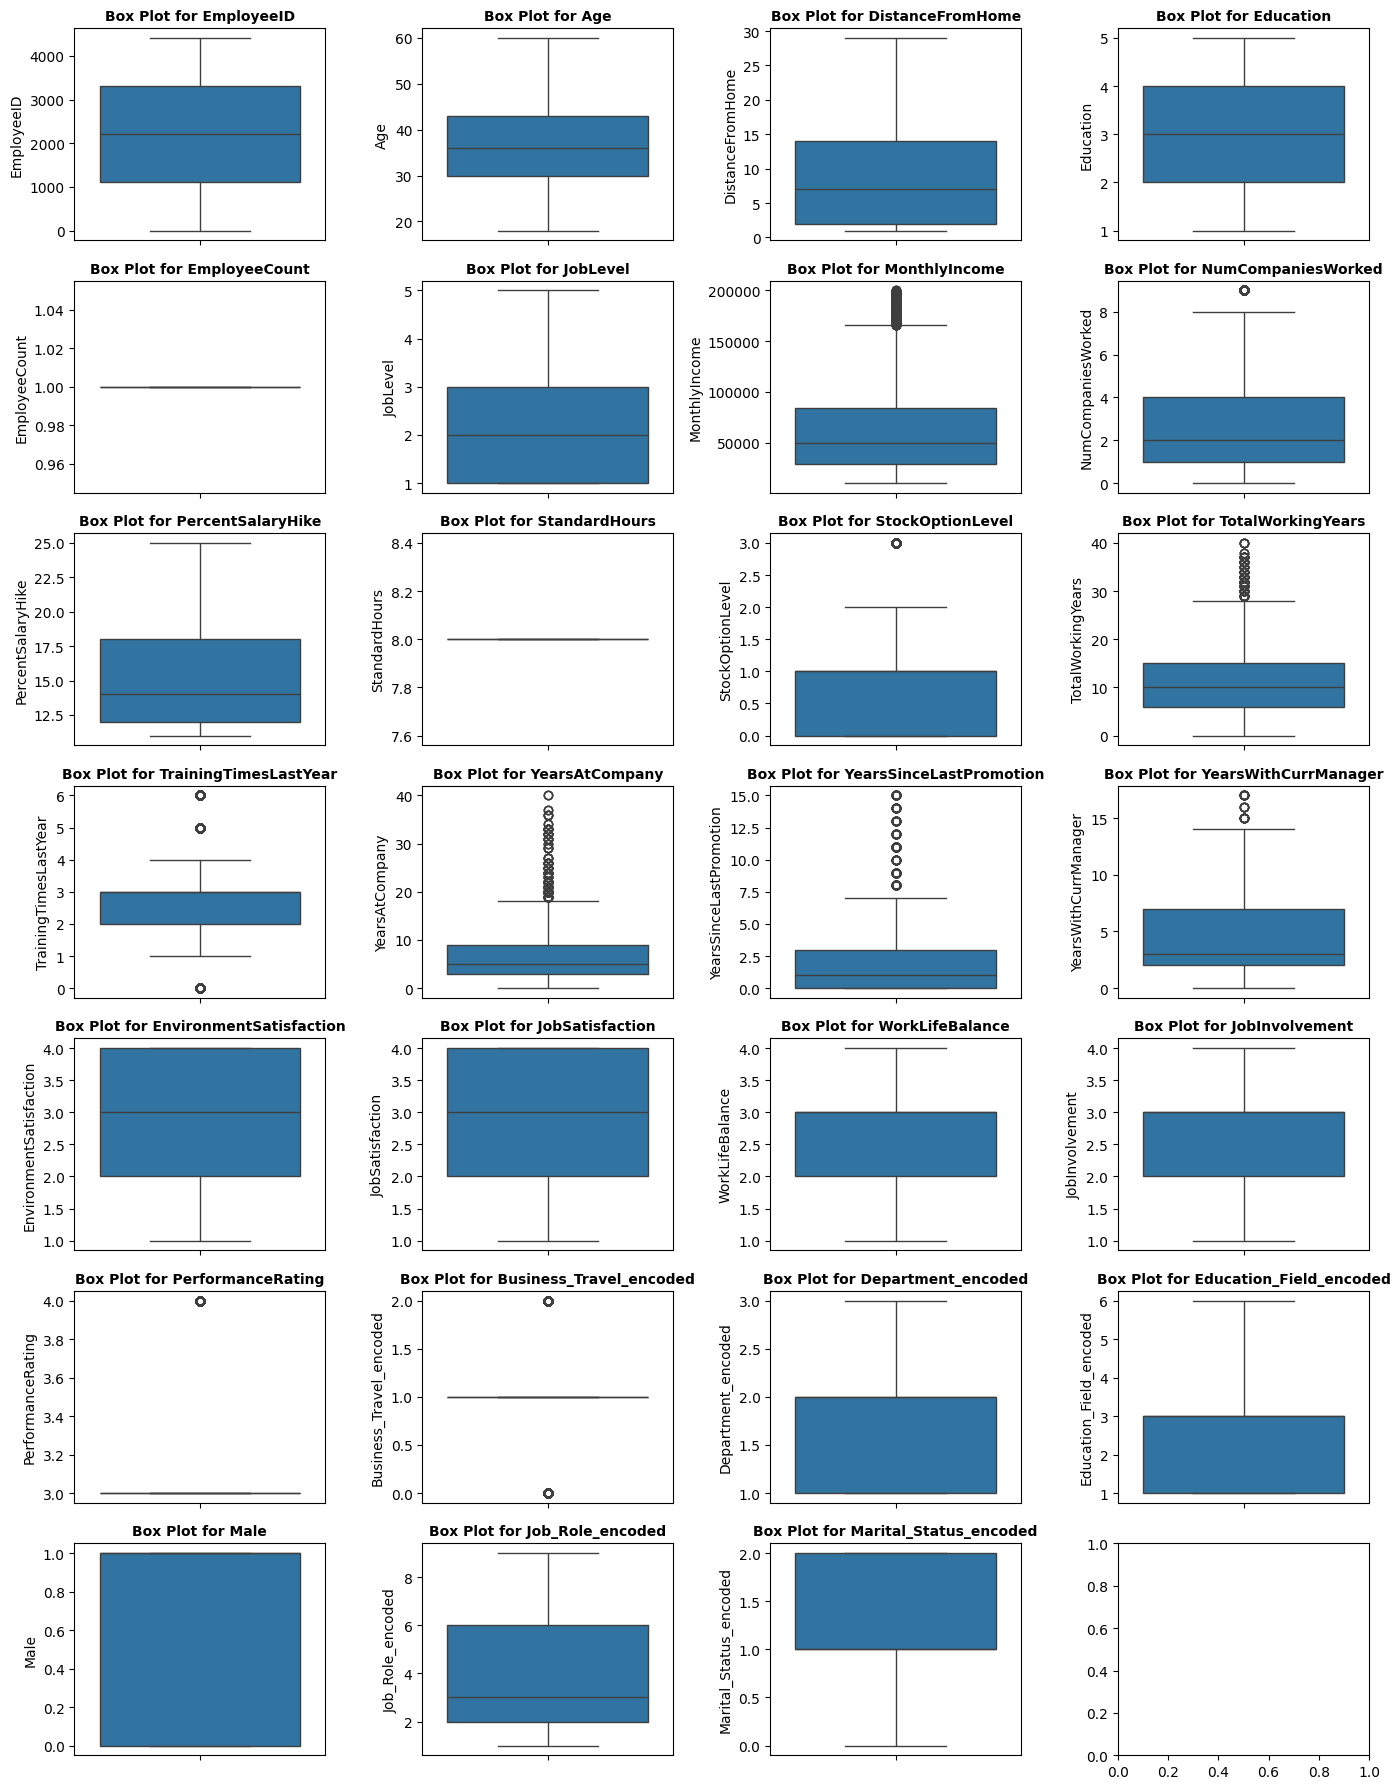

In [29]:
independent_cols = emp.drop('Attrition_encoded', axis=1)

#Generating a figure and grid of axes within the figure
col_grid=4
nrows=int(len(independent_cols.columns) / col_grid) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=col_grid, figsize=(14,18))

#Looping through the data
for i, col in enumerate(independent_cols.columns):
    ax=axes.flat[i] #The currrent axis
    sns.boxplot(data=independent_cols[col], ax=ax)
    ax.set_title(f"Box Plot for {col}", fontweight='bold', size=10)
plt.tight_layout()
plt.show()

#### Observation:
The following columns appear to have outliers:
- MonthlyIncome
- NumCompaniesWorked
- TotalWorkingYears
- YearsAtCompany
- YearsSinceLastPromotion
- YearsWithCurrManager

Out of which, the following are categorical columns:
- StockOptionLevel
- TrainingTimesLastYear
- PerformancyRating
- Business_Travel_encoded

*The box plots of categorical columns might represent values with fewer counts as outliers. **Hence, they shouldn't be considered as outliers.***

#### Next Step:
I'll use Interquartile Range (IQR) for capping the outliers to the min and max values in their respective columns.

In [30]:
outlier_cols = emp[['MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears',
                'YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager']]

#Interquartile Range (IQR)
for col in outlier_cols:

    #Calculating IQR
    q1 = emp[col].quantile(0.25) #Percentile 25
    q3 = emp[col].quantile(0.75) #Percentile 75 
    iqr = q3-q1
    
    #Outlier Threshold
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    #Capping the outliers
    emp[col] = numpy.clip(emp[col], lower_bound, upper_bound)

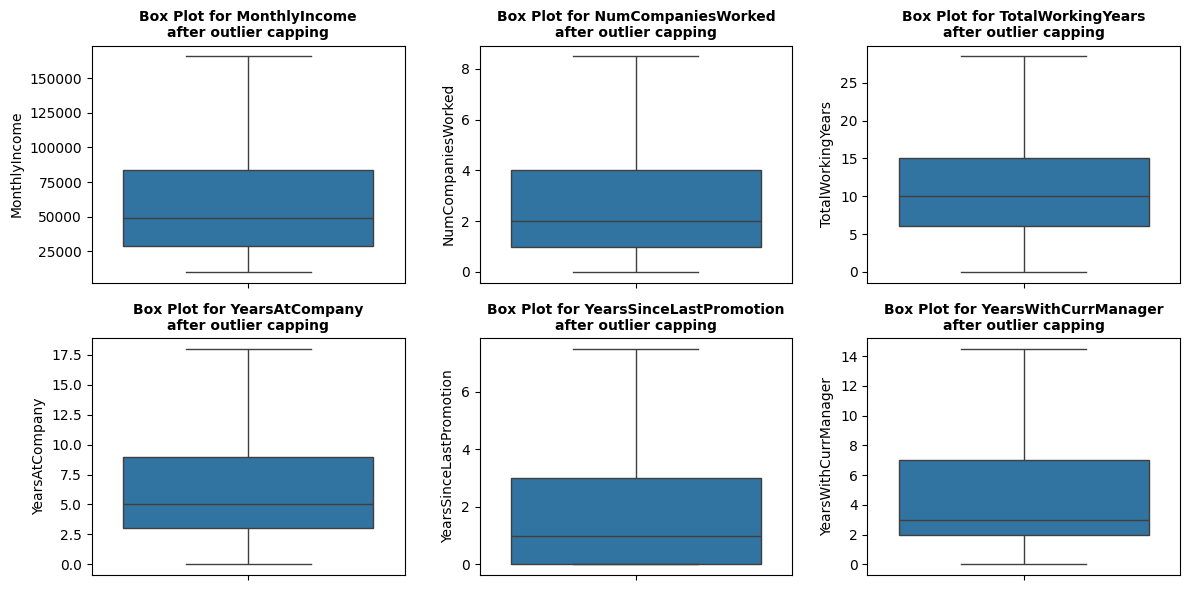

In [31]:
#Visualizing the result
col_grid=3
nrows=int(len(outlier_cols.columns) / col_grid)
fig, axes = plt.subplots(nrows=nrows, ncols=col_grid, figsize=(12,6)) #A figure, and a grid of axes within the figure

#Looping through the columns
for i, col in enumerate(outlier_cols.columns):
    ax=axes.flat[i] #The currrent axis
    sns.boxplot(data=emp[col], ax=ax)
    ax.set_title(f"Box Plot for {col}\nafter outlier capping", fontweight='bold', size=10)
plt.tight_layout()
plt.show()

*The outliers in the categorical columns have been capped.*

#### Feature Engineering

In [32]:
#Train test split
X = emp.drop('Attrition_encoded', axis=1)
y = emp['Attrition_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

##### Historgrams to visualize the distribution of the columns

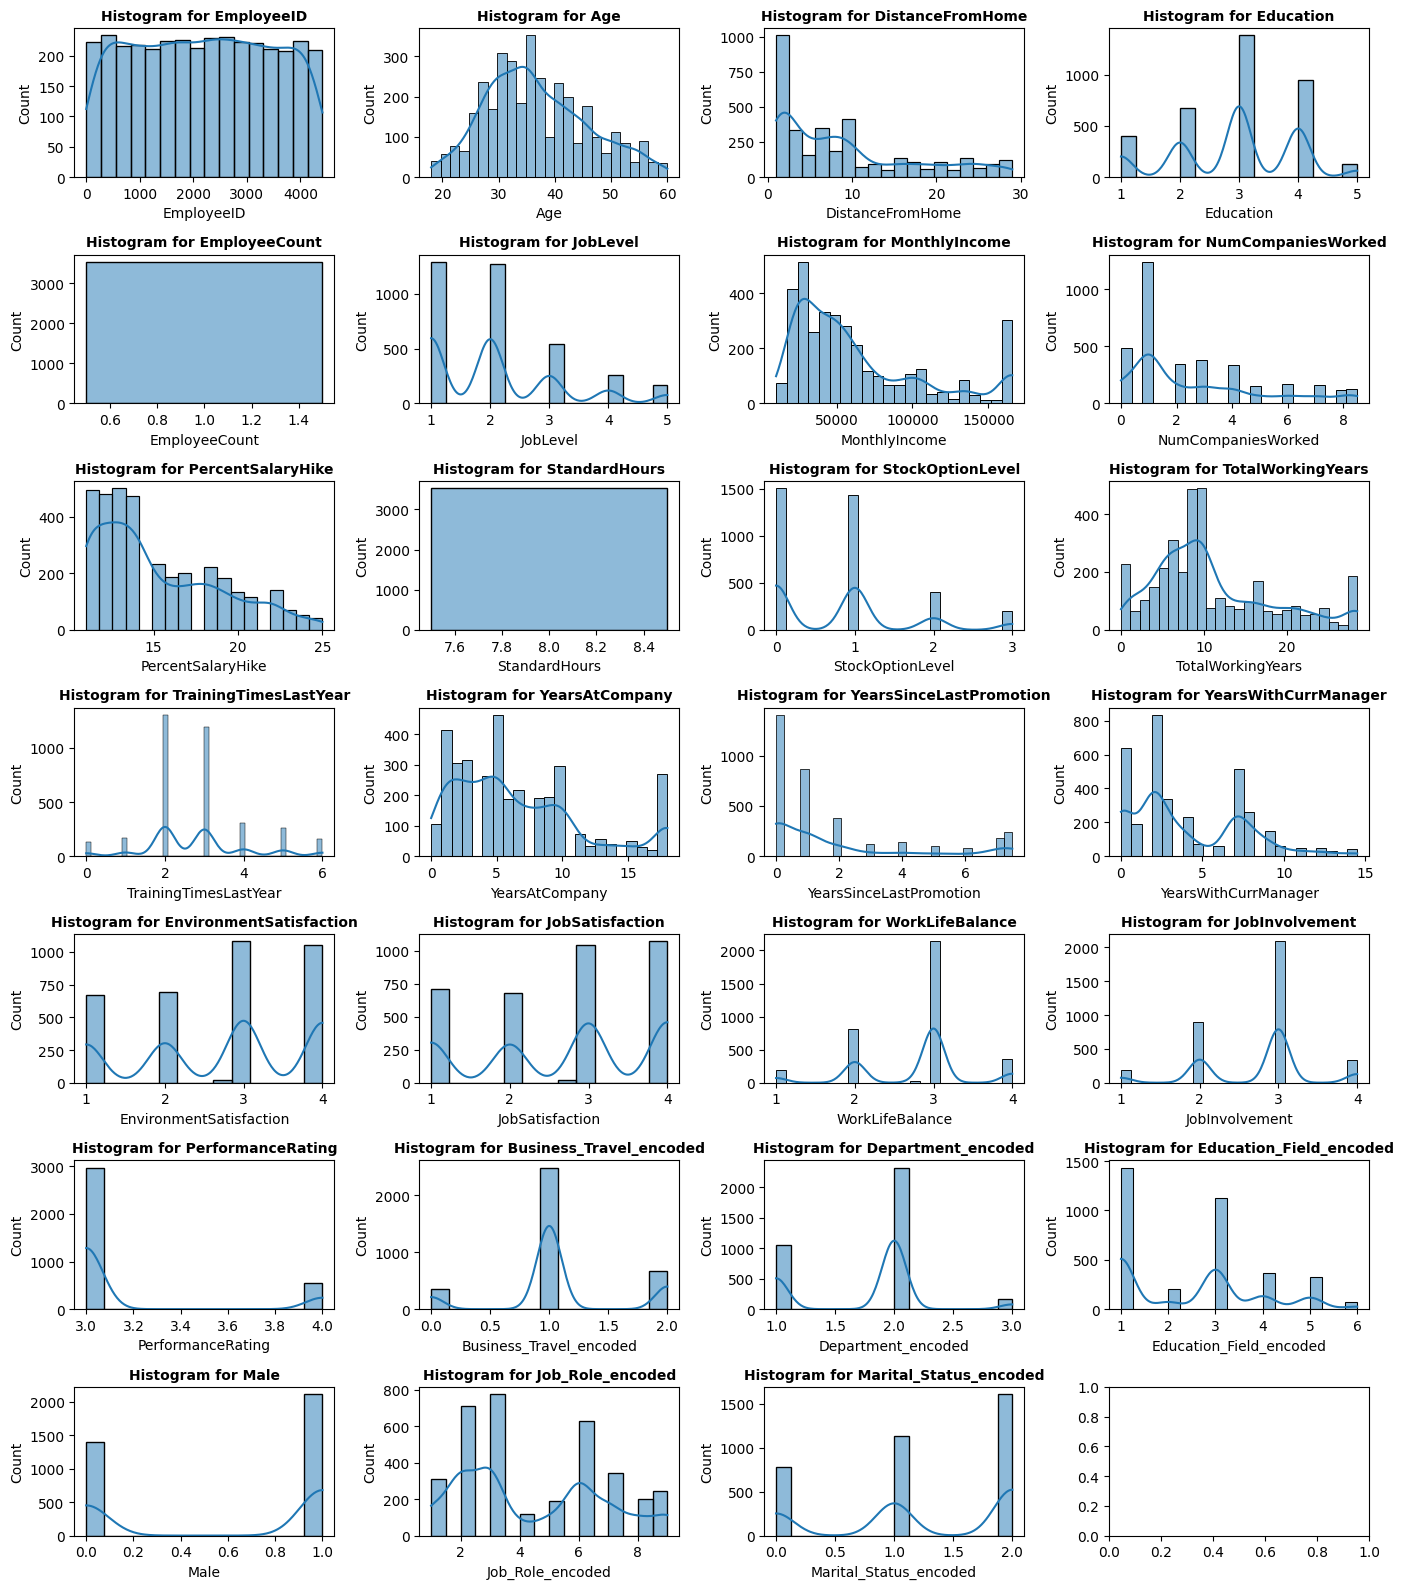

In [33]:
col_grid=4
nrows=int(len(X_train.columns) / col_grid) + 1

#Generating a figure and grid of axes within the figure
fig, axes = plt.subplots(nrows=nrows, ncols=col_grid, figsize=(14,16))

#Looping through the columns
for i, col in enumerate(X_train.columns):
    ax=axes.flat[i] #The currrent axis
    sns.histplot(data=X_train[col], ax=ax, kde=True)
    ax.set_title(f"Histogram for {col}", fontweight='bold', size=10)
plt.tight_layout()
plt.show()

*Most of the numerical columns seem to be right skewed. Hence, I'll use **Log Transformation** to make them 
more normally distributed.*

In [34]:
skewed_num_cols = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
               'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

#Log transformation
for col in skewed_num_cols:
    X_train[col + '_log'] = numpy.log1p(X_train[col])
    X_test[col + '_log'] = numpy.log1p(X_test[col])

#Removing the old columns
X_train.drop(skewed_num_cols, axis=1, inplace=True)
X_test.drop(skewed_num_cols, axis=1, inplace=True)

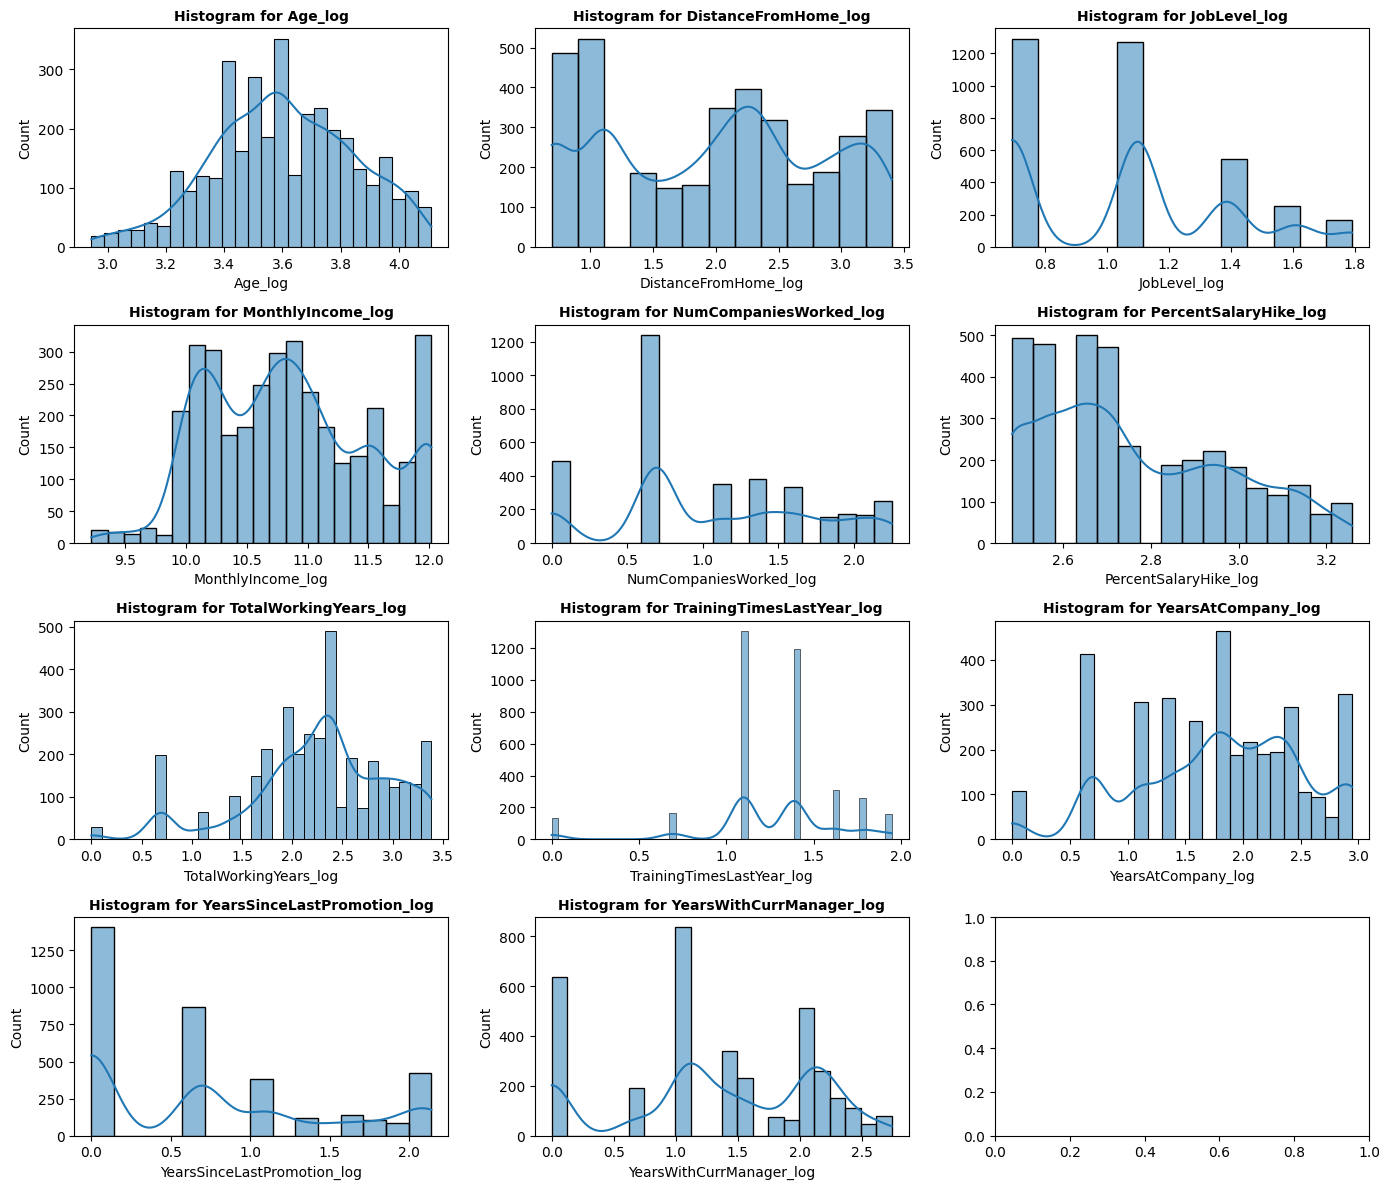

In [35]:
#Visualizing the result
transf_cols = X_train[['Age_log', 'DistanceFromHome_log', 'JobLevel_log', 'MonthlyIncome_log', 'NumCompaniesWorked_log',
                      'PercentSalaryHike_log', 'TotalWorkingYears_log', 'TrainingTimesLastYear_log', 'YearsAtCompany_log',
                      'YearsSinceLastPromotion_log', 'YearsWithCurrManager_log']]
col_grid=3
nrows=int(len(transf_cols.columns) / col_grid) + 1
fig, axes = plt.subplots(nrows=nrows, ncols=col_grid, figsize=(14,12))

#Looping through the columns
for i, col in enumerate(transf_cols.columns):
    ax=axes.flat[i] #The currrent axis
    sns.histplot(data=X_train[col], ax=ax, kde=True)
    ax.set_title(f"Histogram for {col}", fontweight='bold', size=10)
plt.tight_layout()
plt.show()

*The skewed numerical columns have been transformed to improve their normality.*

#### Feature Scaling
I'll perform **Normalization** because the columns have different scales which can negatively impact the performance of the algorithms. It will ensure equal contribtion of the features.

In [36]:
numeric_cols = ['StandardHours', 'Age_log', 'DistanceFromHome_log', 'JobLevel_log', 'MonthlyIncome_log',
                'NumCompaniesWorked_log', 'PercentSalaryHike_log', 'TotalWorkingYears_log', 'TrainingTimesLastYear_log', 
                'YearsAtCompany_log', 'YearsSinceLastPromotion_log', 'YearsWithCurrManager_log']

#Normalizing the numeric columns
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_cols])
scaler.transform(X_train[numeric_cols])
scaler.transform(X_test[numeric_cols])

array([[0.        , 0.89550225, 0.        , ..., 0.87111649, 0.64778108,
        0.80166101],
       [0.        , 0.70022009, 0.14972585, ..., 1.        , 1.        ,
        0.98803658],
       [0.        , 0.82952254, 0.        , ..., 0.81438104, 0.32389054,
        0.75868767],
       ...,
       [0.        , 0.391585  , 0.79026089, ..., 0.81438104, 1.        ,
        0.80166101],
       [0.        , 0.68004708, 0.25595802, ..., 0.47081783, 0.32389054,
        0.4008305 ],
       [0.        , 0.75803839, 0.74404198, ..., 0.        , 0.        ,
        0.        ]])

#### Feature Selection

In [37]:
#Initializing RandomForest and then creating an instance for Boruta algorithm
rf = RandomForestClassifier(random_state=47, max_depth=5, n_jobs=-1)
bor = BorutaPy(rf, n_estimators="auto", random_state=50)

#Boruta algorithm package happens to not work with Numpy functions 'numpy.int', 'numpy.float64' and 'numpy.bool_'.
#This ensures that those old functions aren't used
numpy.int = numpy.int32
numpy.float = numpy.float64
numpy.bool = numpy.bool_

bor.fit(X_train.values, y_train)

#Creating lists for the results of Boruta (Important and weak/uncertain features)
imp_feat = numpy.array(X_train.columns)[bor.support_].tolist()
weak_feat = numpy.array(X_train.columns)[bor.support_weak_].tolist()

#Prinitng the results
print(f"FEATURES SELECTED:\n{imp_feat}\n\nFeatures Boruta is uncertain about:\n{weak_feat}")

FEATURES SELECTED:
['EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Business_Travel_encoded', 'Education_Field_encoded', 'Marital_Status_encoded', 'Age_log', 'DistanceFromHome_log', 'MonthlyIncome_log', 'NumCompaniesWorked_log', 'PercentSalaryHike_log', 'TotalWorkingYears_log', 'YearsAtCompany_log', 'YearsWithCurrManager_log']

Features Boruta is uncertain about:
['Job_Role_encoded', 'TrainingTimesLastYear_log']


#### Observations:
Boruta appears to be unsure about two columns. I'll now use Random Forest alone to visualize feature importance.

In [38]:
#Random Forest for feature importance
rf.fit(X_train, y_train)
impt = rf.feature_importances_

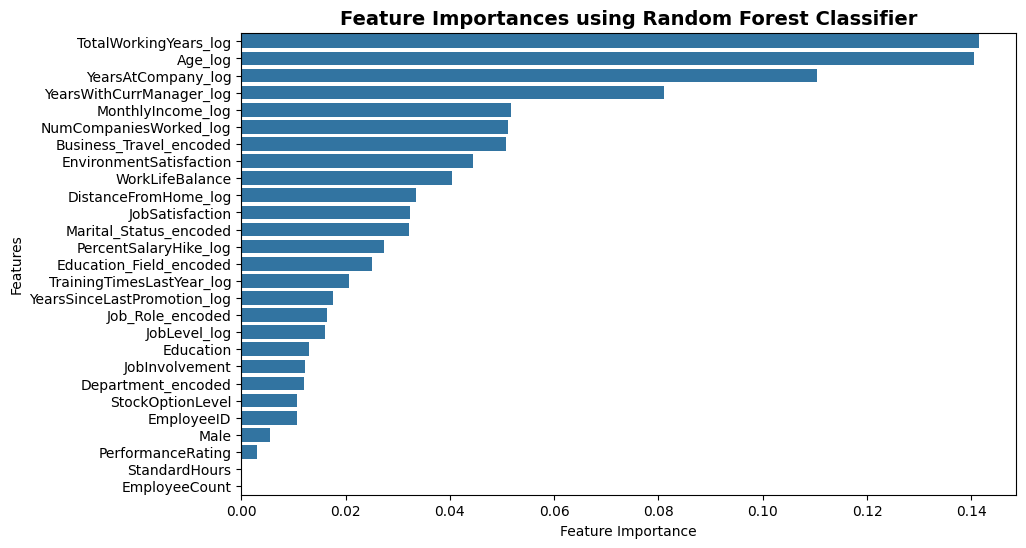

In [39]:
#Visualizing the result
impt_ser = pandas.Series(impt, index = X_train.columns)

#Visualizing the result
plt.figure(figsize=(10, 6))
sns.barplot(x=impt_ser.sort_values(ascending=False).values, y=impt_ser.sort_values(ascending=False).index)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importances using Random Forest Classifier", fontweight='bold', size=14)
plt.show()

#### Observation:
The results of Random Forest feature importance appear to coincide with the results of Boruta. However I do notice some features not contributing to the model among which, EmployeeID seems redundant as it's just a number assigned to the employees to uniquely identify them. Hence, I'll remove it while keeping the rest of the columns for future analysis.

In [40]:
X_train.drop('EmployeeCount', axis=1, inplace=True)
X_test.drop('EmployeeCount', axis=1, inplace=True)

#### Inspecting Correlation
I'll plot a correlation heatmap of the data in order to inspect the existance of strongly correlated features.

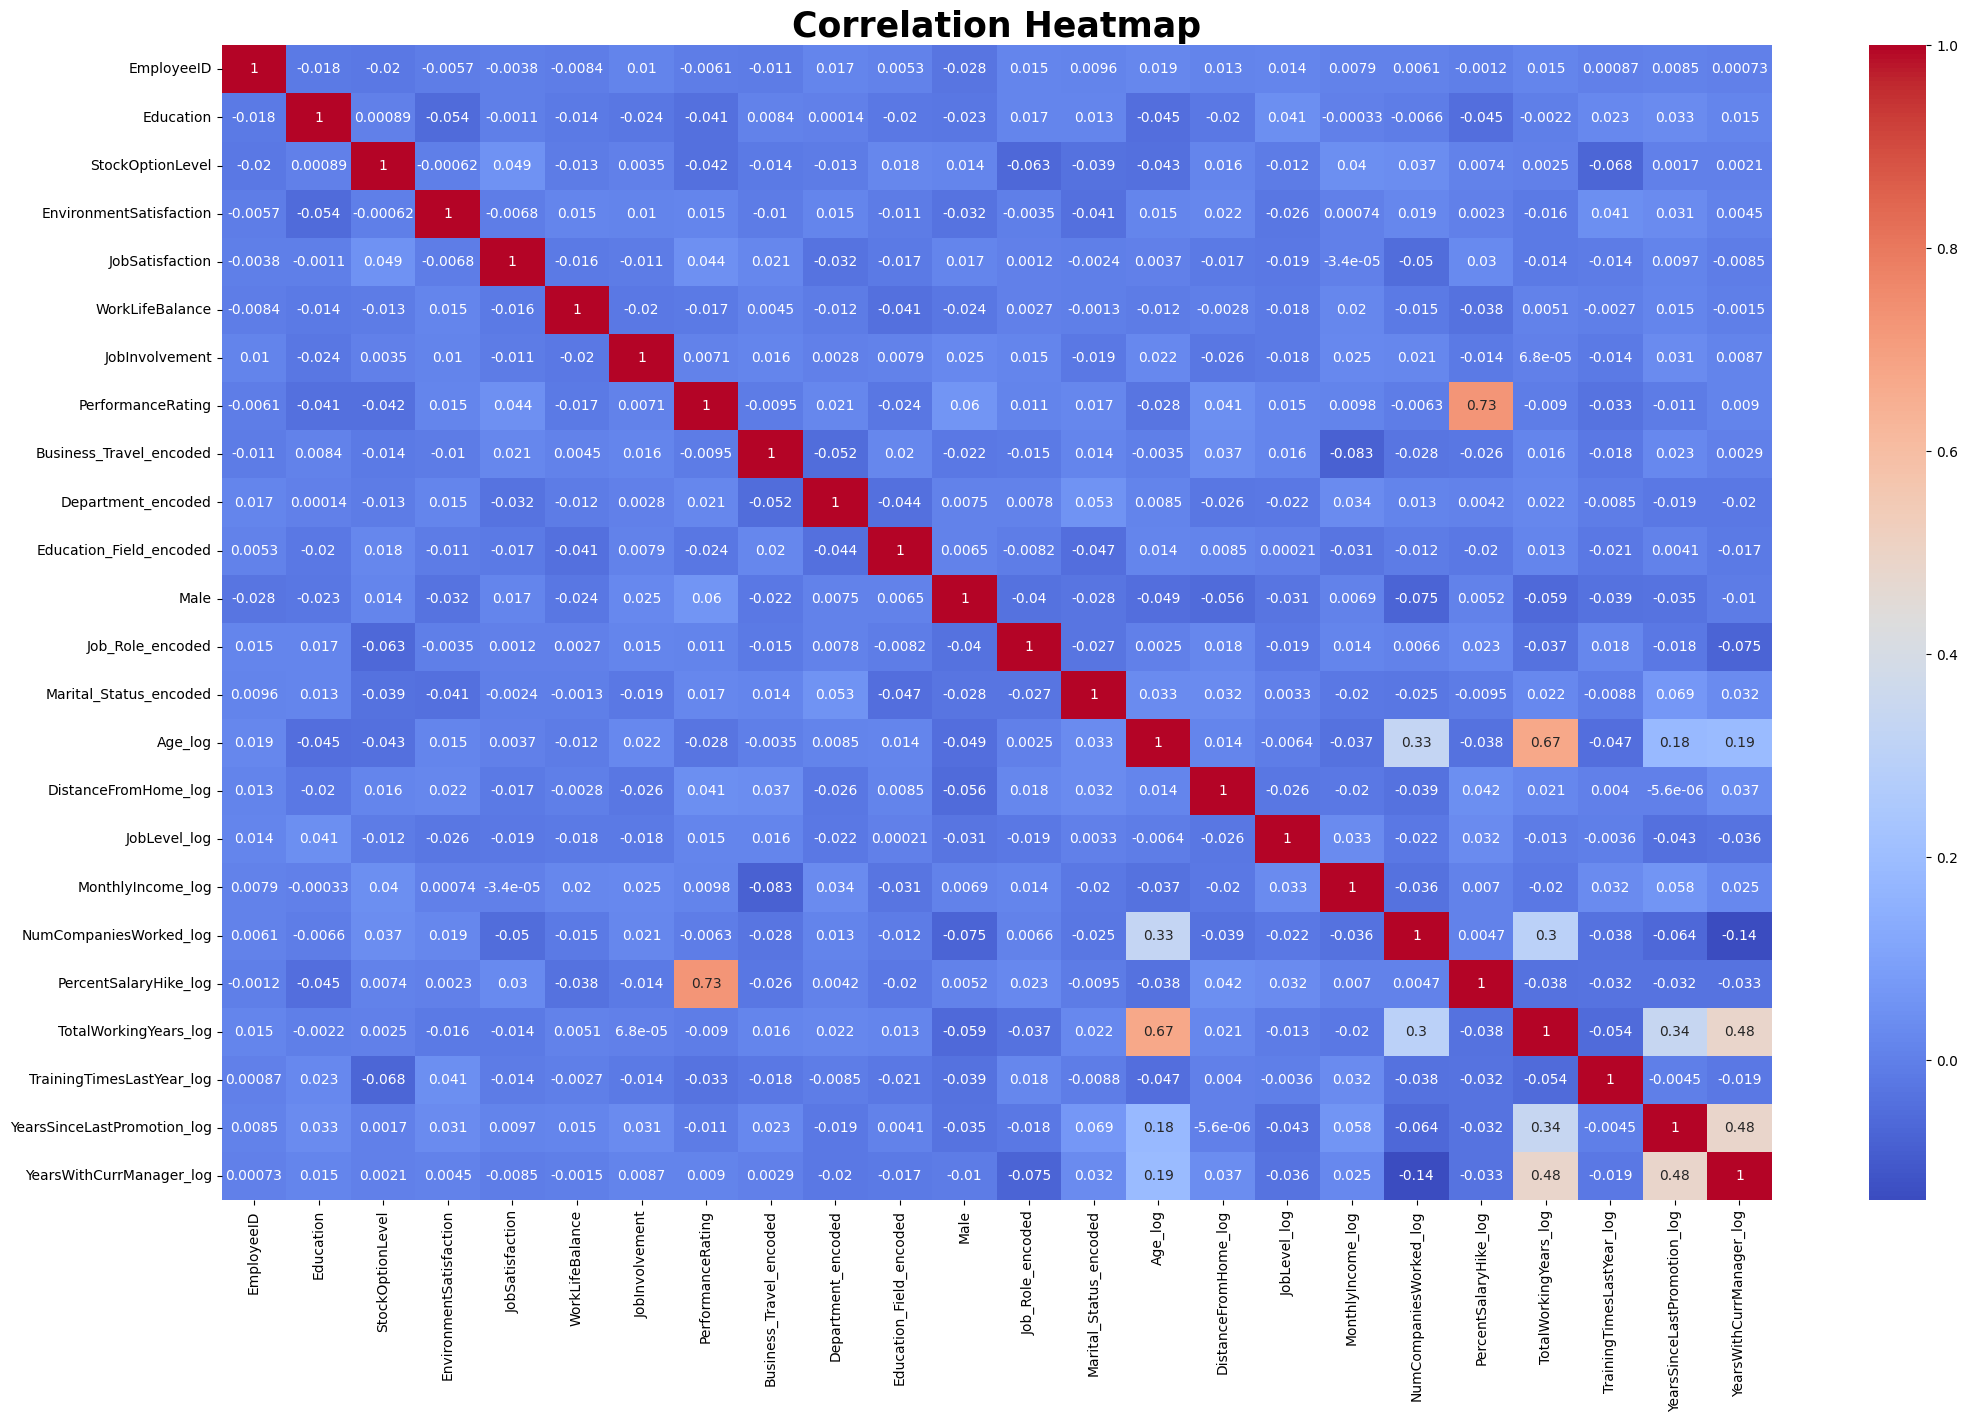

In [50]:
#Correlation Heatmap
plt.figure(figsize=(25,15))
sns.heatmap(X_train.corr(),annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontweight='bold', size=25)
plt.show()

#### Observations, Hurdles and Solutions:
- Overall, the various columns in the data appear to have low correlation among them except a few.
- The 'YearsAtCompany_log' and 'YearsWithCurrentManager_log' seem highly correlated. They also share a slight coorelation with the 'TotalWorkingYears_log' although that in comparison is higher in the case of 'YearsAtCompany_log' hence I'll remove it.
- The 'StandardHours' column appears to have not been included in the heatmap, suggesting its irrelevance; hence, I'll remove it from further analysis.

In [42]:
X_train.drop(['StandardHours', 'YearsAtCompany_log'], axis=1, inplace=True)
X_test.drop(['StandardHours', 'YearsAtCompany_log'], axis=1, inplace=True)

#### Target Column Balancing

In [43]:
before_balancing = y_train.value_counts()
before_balancing

Attrition_encoded
0    2959
1     569
Name: count, dtype: int64

*The 'Yes' class is severely underrepresented in the data. I'll be using **SMOTE (Synthetic Minority Over-sampling Technique)**. It will generate virtual training records by linear interpolation for the minority class.*

In [44]:
#Balancing
smote = SMOTE(random_state=75)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [45]:
print(f"VALUE COUNT OF SENTIMENTS\nBefore balancing:\n{before_balancing}\n\nAfter balancing:\n{y_train_res.value_counts()}")

VALUE COUNT OF SENTIMENTS
Before balancing:
Attrition_encoded
0    2959
1     569
Name: count, dtype: int64

After balancing:
Attrition_encoded
0    2959
1    2959
Name: count, dtype: int64


In [46]:
X_train_res.shape

(5918, 24)

In [47]:
y_train_res.shape

(5918,)

In [48]:
X_test.shape

(882, 24)

In [49]:
y_test.shape

(882,)

## Stage 3: MODEL BUILDING AND TRAINING <a id="section-four"></a>
Objectives:
- Creating functions for Model building and evaluation.
- Training and evaluating the models.

#### Function for Model Building

In [52]:
#Model building, training and evaluation
def train_eval_model(model, parameters, X, y):
    #Training and validation set
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
    
    #Cross-validation
    cv_rs = RepeatedStratifiedKFold(n_splits=10, n_repeats=4, random_state=45)
    
    #Hyperparameter Tuning
    param_search = GridSearchCV(model, parameters, cv=cv_rs, scoring='f1', n_jobs=-1)

    #Training the model
    param_search.fit(X_train, y_train)
    tuned_model = param_search.best_estimator_
    print(f"Parameters selected by GridSearchCV are:\n{tuned_model}")
    
    #Predictions
    y_train_pred = tuned_model.predict(X_train)
    y_val_pred = tuned_model.predict(X_val)
    y_val_prob = tuned_model.predict_proba(X_val)[:, 1]

    #Statistical Results for Training Set
    print("\n")
    print("TRAINING SET RESULTS:")
    print("\n")
    print(f"Classification Report:\n{metrics.classification_report(y_train, y_train_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_train, y_train_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_train, y_train_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_train, y_train_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_train, y_train_pred):.2f}")
    print("." * 55)
    print("\n")

    #Statistical Results for Validation Set
    print("VALIDATION SET RESULTS:")
    print("\n")
    print(f"Classification Report:\n{metrics.classification_report(y_val, y_val_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_val, y_val_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_val, y_val_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_val, y_val_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_val, y_val_pred):.2f}")
    print("." * 55)
    print("\n")
    
    return tuned_model, y_val, y_val_pred, y_val_prob

 #### Function for Model Evaluation

In [53]:
#Model evaluation
def evaluate_model(tuned_model, y_val, y_val_pred, y_val_prob):

    #Confusion Matrix
    cm = metrics.confusion_matrix(y_val, y_val_pred)
    plt.figure(figsize=(5,5))
    cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_plot.plot()
    plt.title(f'Confusion Matrix for {type(tuned_model).__name__}', fontweight='bold')
    plt.show()

    print("." * 55)
    
    #Receiver Operating Characteristic (ROC) Curve
    fpr, tpr, thresholds = metrics.roc_curve(y_val, y_val_prob)
    roc_auc = metrics.auc(fpr, tpr) ##Calculating Area Under The ROC Curve (AUC)    
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='purple', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--') #Reference line
    plt.xlim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {type(tuned_model).__name__}', fontweight='bold')
    plt.legend(loc='best')
    plt.show()
    print("Note for AUC: A higher AUC indicates better performance.")
    '''
    Average recall will provide a balanced evaluation by considering the performance on each class equally.
    '''
    print("." * 55)
    
    #Calculating Average Recall (AR)
    average_recall = metrics.recall_score(y_val, y_val_pred, average='macro') #Macro-average recall treats each class equally.
    #{Average recall will provide a balanced evaluation by considering the performance on each class equally unlike Accuracy in this case.}
    
    #Precision-Recall Curve
    precision, recall, thresholds = metrics.precision_recall_curve(y_val, y_val_prob)
    plt.figure(figsize=(6,4))
    plt.plot(recall, precision, color='purple', lw=2, label=f"Precision-Recall curve (Average Recall: {average_recall:.2f})")
    plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle="--") #Reference Line
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve for {type(tuned_model).__name__}', fontweight='bold')
    plt.legend(loc='best')
    plt.show()
    print("Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall")
    
    return None

#### Implementing the models

##### Logistic Regression Classifier

In [54]:
lr = LogisticRegression()
lr_params= {
    'max_iter': [1000,1100,1200,1300],
    'penalty': ['l2'],
    'C':[0000.1, 000.1, 00.1, 0.1, 1, 2]
}
tuned_lr, y_val_lr, y_val_pred_lr, y_val_prob_lr = train_eval_model(lr, lr_params, X_train_res, y_train_res)

Parameters selected by GridSearchCV are:
LogisticRegression(C=1, max_iter=1100)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      2367
           1       0.76      0.77      0.77      2367

    accuracy                           0.76      4734
   macro avg       0.76      0.76      0.76      4734
weighted avg       0.76      0.76      0.76      4734

.......................................................
Accuracy: 0.76
Precision: 0.76
Recall: 0.77
F1 Score (Harmonic mean of precision and recall): 0.77
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       592
           1       0.74      0.77      0.75       592

    accuracy                           0.75      1184
   macro avg       0.75      0.75      0.75      1184
weighted a

##### Random Forest Classifier

In [55]:
rf = RandomForestClassifier()
rf_params = {
    'n_estimators': [10, 50, 100, 200],
    'random_state': [43],
    'max_depth': [5, 10, 20, 30, None],
    'min_samples_split': [2, 3, 12],
    'min_samples_leaf': [1, 2, 4]
}
tuned_rf, y_val_rf, y_val_pred_rf, y_val_prob_rf = train_eval_model(rf, rf_params, X_train_res, y_train_res)

Parameters selected by GridSearchCV are:
RandomForestClassifier(max_depth=20, random_state=43)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2367
           1       1.00      1.00      1.00      2367

    accuracy                           1.00      4734
   macro avg       1.00      1.00      1.00      4734
weighted avg       1.00      1.00      1.00      4734

.......................................................
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score (Harmonic mean of precision and recall): 1.00
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       592
           1       1.00      0.98      0.99       592

    accuracy                           0.99      1184
   macro avg       0.99      0.99      0.99      

##### eXtreme Gradient Boosting Classifier

In [57]:
xgb = XGBClassifier() 
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'random_state': [44],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0]
}
tuned_xgb, y_val_xgb, y_val_pred_xgb, y_val_prob_xgb = train_eval_model(xgb, xgb_params, X_train_res, y_train_res)

Parameters selected by GridSearchCV are:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=44, ...)


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2367
           1       1.00      1.00      1.00      2

##### K-Nearest Neighbours (KNN) Classifier

In [58]:
knn =  KNeighborsClassifier() 
knn_params = {
    'n_neighbors': [3, 5],
    'metric': ['manhattan'],
    'weights': ['distance', 'uniform']
}
tuned_knn, y_val_knn, y_val_pred_knn, y_val_prob_knn = train_eval_model(knn, knn_params, X_train_res, y_train_res)

Parameters selected by GridSearchCV are:
KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')


TRAINING SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2367
           1       1.00      1.00      1.00      2367

    accuracy                           1.00      4734
   macro avg       1.00      1.00      1.00      4734
weighted avg       1.00      1.00      1.00      4734

.......................................................
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score (Harmonic mean of precision and recall): 1.00
.......................................................


VALIDATION SET RESULTS:


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.61      0.74       592
           1       0.71      0.97      0.82       592

    accuracy                           0.79      1184
   macro avg       0.84    

#### Evaluating the models

##### Logistic Regression Classifier

<Figure size 500x500 with 0 Axes>

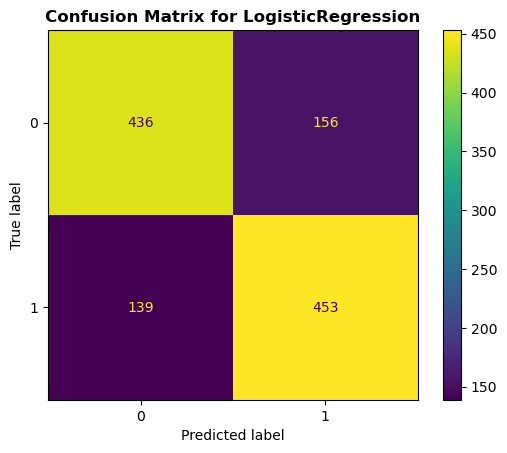

.......................................................


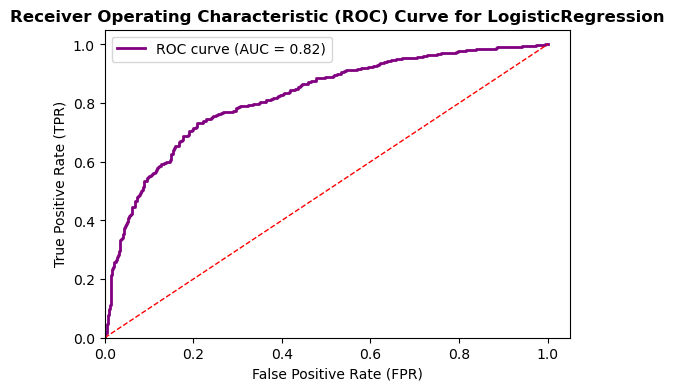

Note for AUC: A higher AUC indicates better performance.
.......................................................


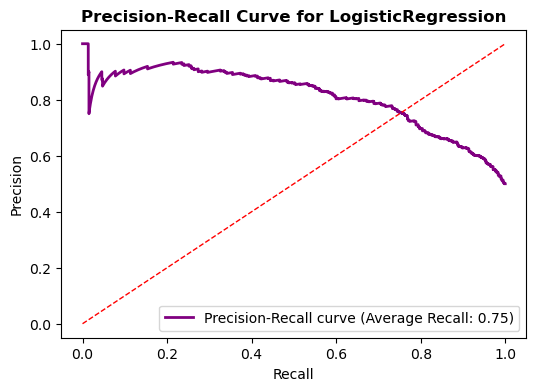

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [59]:
evaluate_model(tuned_lr, y_val_lr, y_val_pred_lr, y_val_prob_lr)

##### Random Forest Classifier

<Figure size 500x500 with 0 Axes>

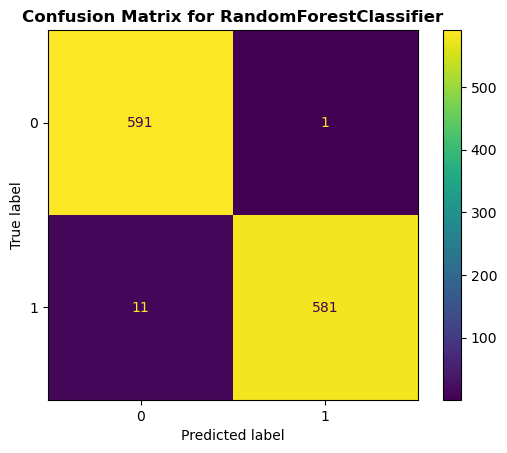

.......................................................


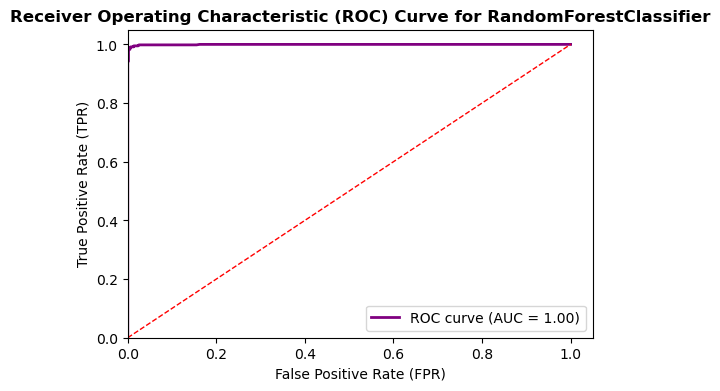

Note for AUC: A higher AUC indicates better performance.
.......................................................


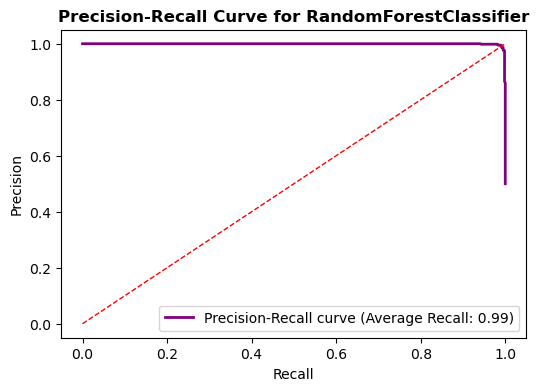

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [60]:
evaluate_model(tuned_rf, y_val_rf, y_val_pred_rf, y_val_prob_rf)

##### eXtreme Gradient Boost Classifier

<Figure size 500x500 with 0 Axes>

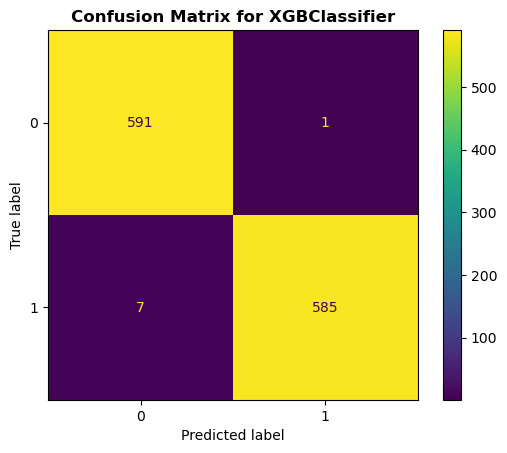

.......................................................


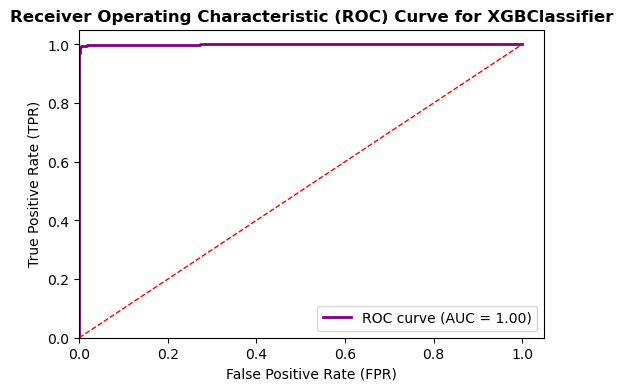

Note for AUC: A higher AUC indicates better performance.
.......................................................


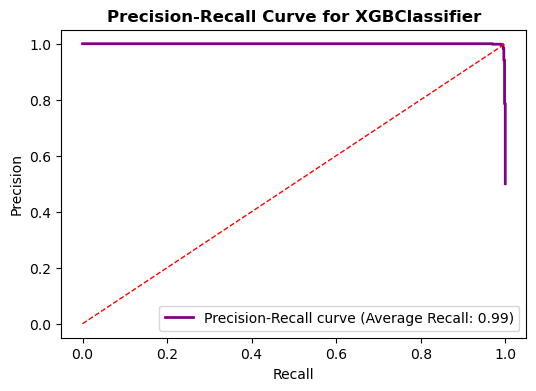

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [61]:
evaluate_model(tuned_xgb, y_val_xgb, y_val_pred_xgb, y_val_prob_xgb)

##### K-Nearest Neighbours (KNN) Classifier

<Figure size 500x500 with 0 Axes>

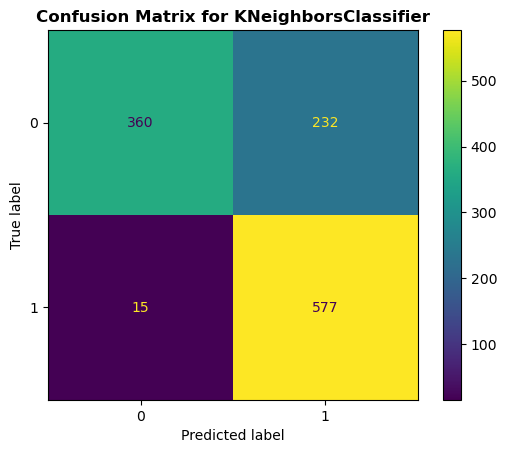

.......................................................


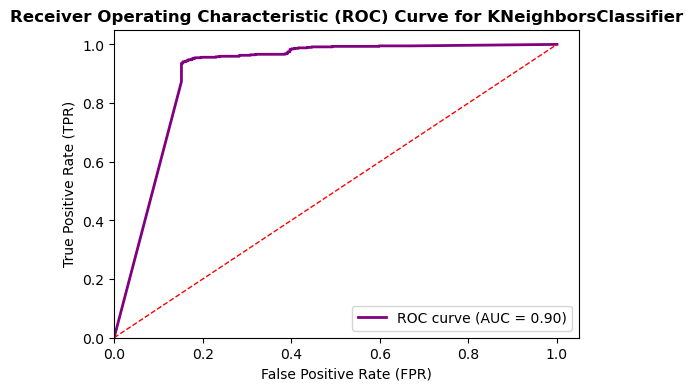

Note for AUC: A higher AUC indicates better performance.
.......................................................


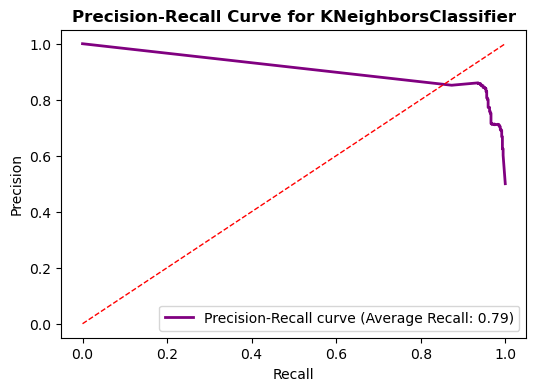

Note for Precision-Recall Curve: A curve closer to the top-right corner represents a good balance between precision and recall


In [62]:
evaluate_model(tuned_knn, y_val_knn, y_val_pred_knn, y_val_prob_knn)

#### Observations:
- eXtreme Gradient Boost Classifier predicted both the classes with the most accuracy followed by Random Forest Classifier.
- K-Nearest Neighbours (KNN) Classifier performed the worst.

## Stage 4: MODEL TESTING <a id="section-five"></a>
Objectives:
- Creating functions for model testing and evaluation.
- Testing the models.

In [63]:
#Model evaluation
def evaluate_test_model(final_model, y_test, y_test_pred, y_test_prob):

    #Statistical Results for the test set
    print("TEST SET RESULTS:")
    print("." * 55)
    print(f"Classification Report:\n{metrics.classification_report(y_test, y_test_pred)}")
    print("." * 55)
    print(f"Accuracy: {metrics.accuracy_score(y_test, y_test_pred):.2f}")
    print(f"Precision: {metrics.precision_score(y_test, y_test_pred):.2f}")
    print(f"Recall: {metrics.recall_score(y_test, y_test_pred):.2f}")
    print(f"F1 Score (Harmonic mean of precision and recall): {metrics.f1_score(y_test, y_test_pred):.2f}")
    print("." * 55)
    print("\n")
    
    #Confusion Matrix for the test set
    cm = metrics.confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(5,5))
    cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
    cm_plot.plot()
    plt.title(f'Confusion Matrix for {type(final_model).__name__} Classifier', fontweight='bold')
    plt.show()
    print("." * 55)
    print("\n")

    return None

##### Testing and evaluating the models

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       740
           1       0.27      0.51      0.36       142

    accuracy                           0.70       882
   macro avg       0.58      0.63      0.58       882
weighted avg       0.79      0.70      0.73       882

.......................................................
Accuracy: 0.70
Precision: 0.27
Recall: 0.51
F1 Score (Harmonic mean of precision and recall): 0.36
.......................................................




<Figure size 500x500 with 0 Axes>

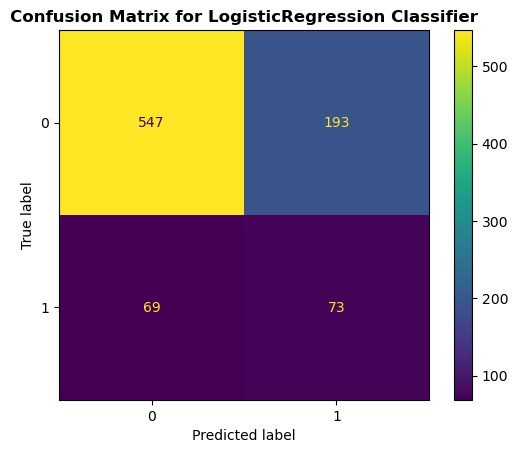

.......................................................




In [64]:
#Logistic Regression
y_test_pred_lr = tuned_lr.predict(X_test)
y_test_prob_lr = tuned_lr.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_lr, y_test, y_test_pred_lr, y_test_prob_lr)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       740
           1       0.98      0.92      0.95       142

    accuracy                           0.98       882
   macro avg       0.98      0.96      0.97       882
weighted avg       0.98      0.98      0.98       882

.......................................................
Accuracy: 0.98
Precision: 0.98
Recall: 0.92
F1 Score (Harmonic mean of precision and recall): 0.95
.......................................................




<Figure size 500x500 with 0 Axes>

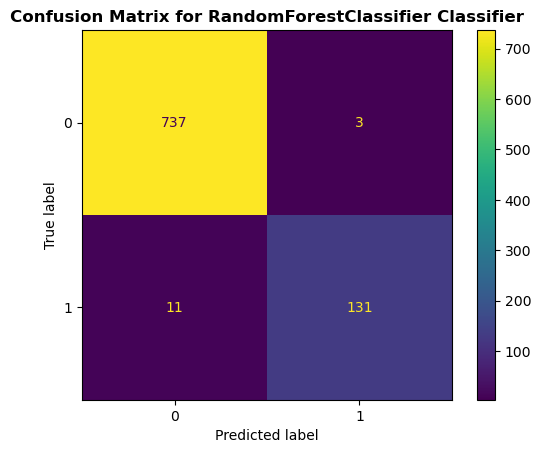

.......................................................




In [65]:
#Random Forest Classifier
y_test_pred_rf = tuned_rf.predict(X_test)
y_test_prob_rf = tuned_rf.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_rf, y_test, y_test_pred_rf, y_test_prob_rf)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       740
           1       0.99      0.94      0.96       142

    accuracy                           0.99       882
   macro avg       0.99      0.97      0.98       882
weighted avg       0.99      0.99      0.99       882

.......................................................
Accuracy: 0.99
Precision: 0.99
Recall: 0.94
F1 Score (Harmonic mean of precision and recall): 0.96
.......................................................




<Figure size 500x500 with 0 Axes>

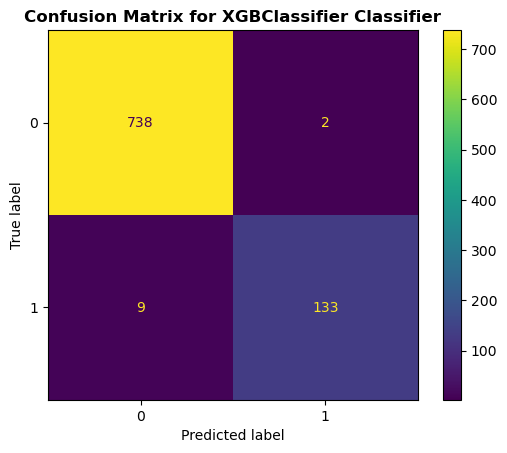

.......................................................




In [67]:
#XGBClassifier
y_test_pred_xgb = tuned_xgb.predict(X_test)
y_test_prob_xgb = tuned_xgb.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_xgb, y_test, y_test_pred_xgb, y_test_prob_xgb)

TEST SET RESULTS:
.......................................................
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.56      0.68       740
           1       0.20      0.56      0.29       142

    accuracy                           0.56       882
   macro avg       0.53      0.56      0.49       882
weighted avg       0.76      0.56      0.62       882

.......................................................
Accuracy: 0.56
Precision: 0.20
Recall: 0.56
F1 Score (Harmonic mean of precision and recall): 0.29
.......................................................




<Figure size 500x500 with 0 Axes>

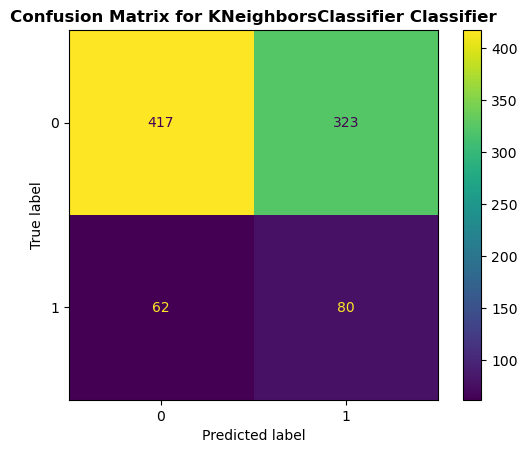

.......................................................




In [68]:
#K-Nearest Neighbours (KNN) Classifier
y_test_pred_knn = tuned_knn.predict(X_test)
y_test_prob_knn = tuned_knn.predict_proba(X_test)[:, 1]
evaluate_test_model(tuned_knn, y_test, y_test_pred_knn, y_test_prob_knn)

## CONCLUSION <a id="section-six"></a>
The eXtreme Gradient Boosting (XGBoost) Classifier made the most accurate predictions over the test set, followed by Random Forest Classifier.
Therefore, I select eXtreme Gradient Boosting (XGBoost) Classifier as the final model for future attrition predictions.

##### Based on the PowerBI Dashboard, the attrition was the highest among the following categories:

- Department: Research & Development
- Job Role: Sales Executive
- Gender: Male
- Education Field: Life Sciences
- Marital Status: Single

##### Other trends for most attrition among employees:

- The total number of employees who attrited was 771 out of a total of 4410 employees.
- The attrition rate was 16.12%.
- Most attrited employees left in less than a year and were earning relatively low salaries.
- Employees who rarely experienced business travel opportunities.
- Employees who had only worked at a single company.
- Employees who gave an Environment Satisfaction rating of 1.

#### Recommended Solutions:
- Given the high attrition of new employees, managers should be asked to explain the reasons for this and even be replaced if necessary.
- The work environment needs to be analyzed for potential discouraging factors.
- Employees in the roles of Sales Executive, Research Scientist, along with other roles, should be asked for their feedback.
- More employees should be given business travel opportunities or short vacations if feasible.
- Information related to future salary hikes and promotions should be disclosed early on to improve employee satisfaction.
- Other relevant steps should be taken to avoid overburdening employees, and a level of mutual respect must be maintained.

<p style="text-align:center;"> - THANK YOU - </p>